# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

#### <center>ALUNO: Hércules de Sousa Silva </center>

<div class="alert alert-block alert-info">
    <h1>1. INTRODUÇÃO</h1>
</div>

O ser humano sempre esteve em busca de descobrir padrões para os fenômenos da natureza pelos mais diversos motivos, sendo que os principais deles são: 

1. Para a compreesão desses acontecimentos com base no padrão observado a partir de raciocínios lógico-dedutivos;
2. Para tentar prever possíveis repetições desse fenômeno.

Isso se tornou ainda mais evidente nos últimos tempos com a chegada da pandemia. A disseminação exponencial e o aumento assustador no números de mortos ao longo do tempo fez com que se criasse incerteza, e a partir desta é inerente que nos perguntemos: o que virá a seguir?

Neste ponto existem diversas abordagens, e a que será abordada neste notebook é a **regressão linear** que cria uma reta com base no coeficiente de correlação entre duas variáveis a fim de estimar valores vindouros.

<div class="alert alert-block alert-info">
    <h1>2. DESCRIÇÃO DO PROBLEMA</h1>
</div>

Na área de Estatística e Econometria, a **regressão linear** é uma equação para se estimar o valor esperado de uma variável *y*, dados os valores de algumas outras variáveis *x*. Seu objetivo é traçar uma reta que seja a melhor aproximação dos pontos de um gráfico.

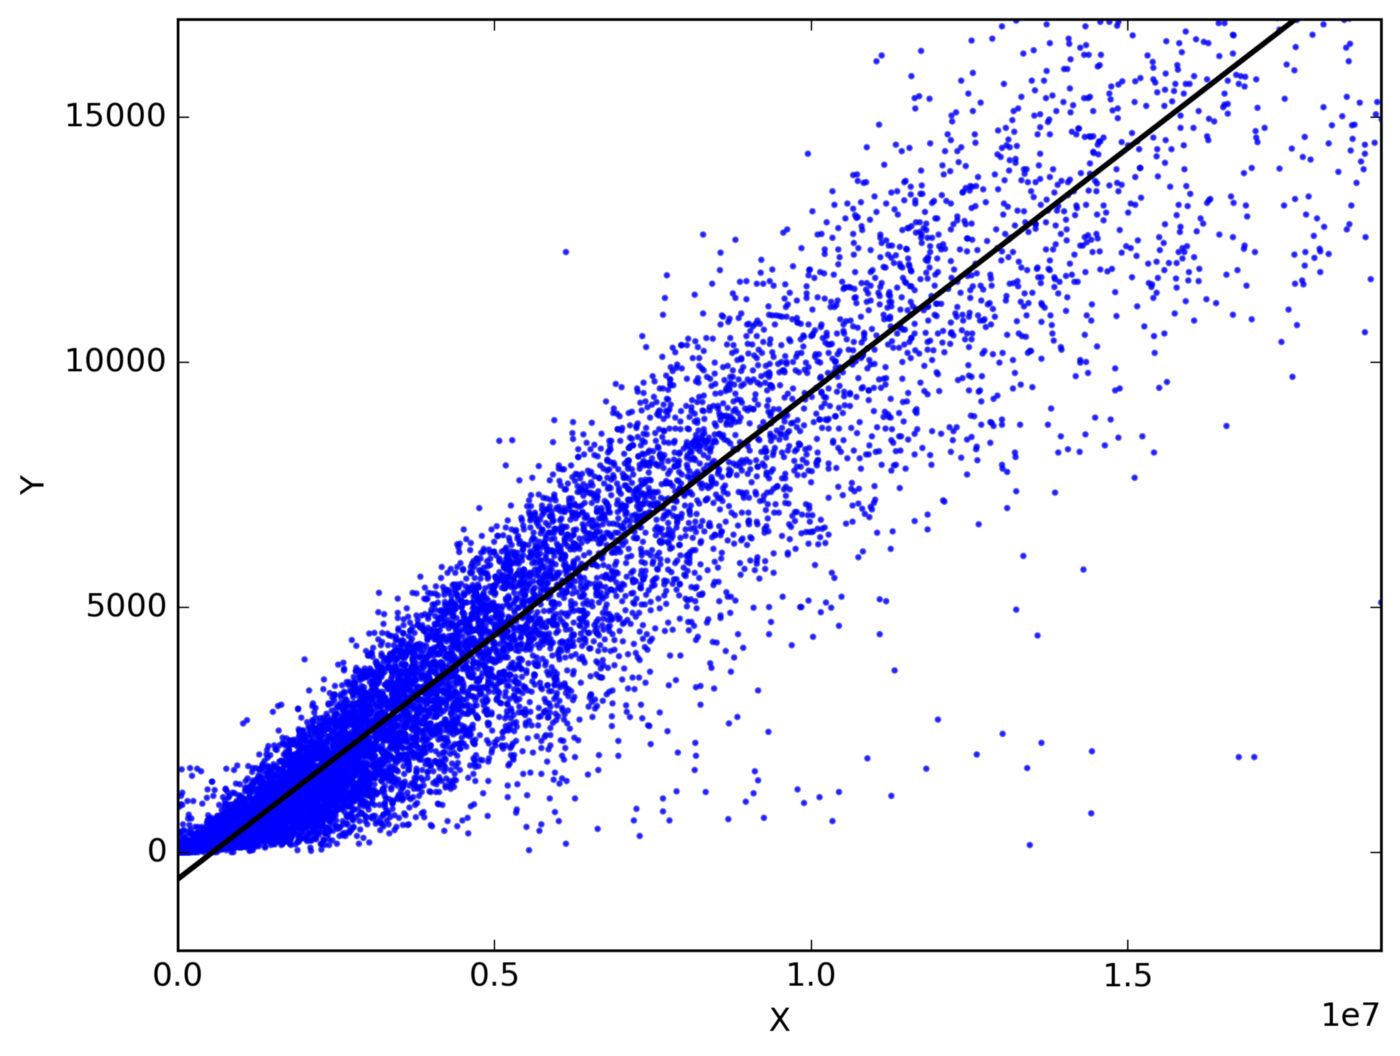

Para se obter essa reta se utiliza o **coeficiente de correlação linear** descrito a seguir:
$$
r=\frac{n * \sum x_i y_i - \sum x_i *\sum y_i}{\sqrt{n * \sum x_i^2 - (\sum x_i)^2} \ * \ \sqrt{n * \sum y_i^2 - (\sum y_i)^2}}
$$

Onde para se obter o coeficiente angular da reta utiliza-se a fórmula:
$$
B = \frac{n * \sum x_i y_i - \sum x_i *\sum y_i}{n * \sum x_i^2 - (\sum x_i)^2}
$$

E para se obter o termo independente usa-se:
$$
a = \frac{\sum y - B * \sum x_i *\sum y_i}{n}
$$

Modelos de regressão linear são utilizados nas mais diversas áreas como ciências biológicas, comportamentais, ambientais e até negócios

<div class="alert alert-block alert-info">
    <h1>3. MÉTODOS APLICADOS À SOLUÇÃO</h1>
</div>

# Singular Value Decomposition - SVD
A decomposição em valores singulares ou singular value decomposition (SVD) é a fatoração de uma matriz real ou complexa que acontece da seguinte maneira:

$$
M = U\Sigma V*
$$

Onde **U** é uma **matriz unitária** m x m real ou complexa, $\Sigma$ é uma **matriz retangular diagonal** m x n com números reais não-negativos e **V*** é a **conjugada transposta** de **V** que nada mais é do que uma **matriz unitária** n x n real ou complexa.

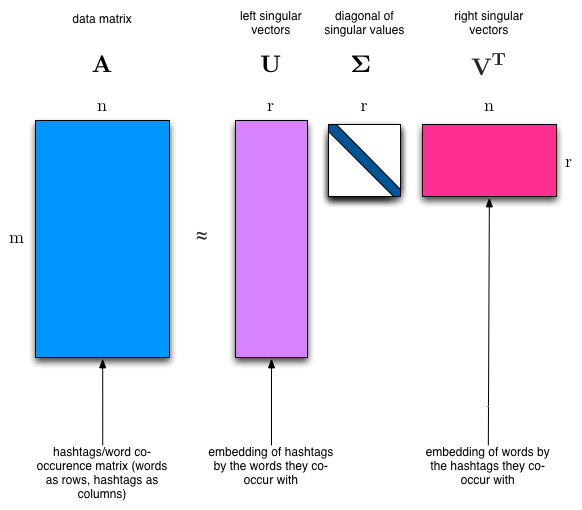

## A vantagem do método SVD
A grande vantagem do uso desse método é que ele permite uma decomposição exata de uma dada matriz, evitando que haja perdas nos dados por aproximação das multiplicações de matrizes.

<div class="alert alert-block alert-info">
    <h1>4. IMPLEMENTAÇÃO UTILIZANDO SVD</h1>
</div>

## Código

### Realizando importação das bibliotecas

In [243]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import math, scipy, numpy as np
from scipy import linalg

In [244]:
np.set_printoptions(precision = 6)

In [245]:
def regr_metrics(act, pred):
    return (math.sqrt(metrics.mean_squared_error(act, pred)), metrics.mean_absolute_error(act, pred))

In [246]:
def ls_svd(A, b):
    U, sigma, Vh = scipy.linalg.svd(A, full_matrices=False, lapack_driver='gesdd')
    w = (U.T @ b) / sigma
    return Vh.T @ w

In [247]:
def get_linear_coeficients(data):
    trn, test, y_trn, y_test = train_test_split(data.data, data.target, test_size=0.2)
    trn_int = np.c_[trn, np.ones(trn.shape[0])]
    test_int = np.c_[test, np.ones(test.shape[0])]
    coeffs_svd = ls_svd(trn_int, y_trn)
    return regr_metrics(y_test, test_int @ coeffs_svd)

In [248]:
trn, test, y_trn, y_test = train_test_split(data.data, data.target, test_size=0.2)
trn_int = np.c_[trn, np.ones(trn.shape[0])]

## Explicação

A função `train_test_split` é utilizada para dividir arrays ou matrizes em subconjuntos de treinos e teste, isto é especialmente útil para **Machine** **Learning**.

```python
trn, test, y_trn, y_test = train_test_split(data.data, data.target, test_size=0.2)
```

As linhas a seguir irão criar uma matriz com matriz original **trn** tendo uma coluna a mais totalmente preenchida com elementos 1 criados pela função `np.ones`.

```python
trn_int = np.c_[trn, np.ones(trn.shape[0])]
test_int = np.c_[test, np.ones(test.shape[0])]
```

A variável `coeffs_svd` recebe o retorno da função `ls_svd` que é uma matriz resultado da multiplicação das matrizes **V** pela matriz **w**, sendo a primeira uma das matrizes provenientes da decomposição SVD feita no conjunto de dados **trn_int** e a segunda o resultado da seguinte expressão:

$$
w = \frac{U^{t}*b}{\Sigma}
$$

Sendo **b** o conjunto de dados **y_trn**.

Após esse cálculos é chamada a função `regr_metrics` que calcula os coeficientes por meio da raiz quadrada do **erro quadrático médio** e do **erro absoluto médio** do conjunto **y_test** e da multiplicação de **test_int** e **coeffs_svd**

<div class="alert alert-block alert-info">
    <h1>5. CASOS DE USO</h1>
</div>

# Exemplo usado no notebook de referência

## Carregando dataset

In [249]:
data = datasets.load_diabetes(as_frame=True)

## Dando uma checada no conjunto de dados

In [250]:
data.frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [251]:
get_linear_coeficients(data)

(54.01112533890066, 43.212160430692954)

# Meu exemplo 

## Carregando dataset

In [252]:
data = datasets.fetch_california_housing(as_frame=True)

## Dando uma checada no conjunto de dados

In [253]:
data.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [254]:
get_linear_coeficients(data)

(0.7425015542455042, 0.5405698287430195)